# I imported pandas for data handling, numpy for numerical operations, and math for weight slab rounding.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
order = pd.read_excel(r"C:\Users\PANKAJ MISHRA\Downloads\Company X - Order Report.xlsx")
sku = pd.read_excel(r"C:\Users\PANKAJ MISHRA\Downloads\Company X - SKU Master.xlsx")
pincode = pd.read_excel(r"C:\Users\PANKAJ MISHRA\Downloads\Company X - Pincode Zones.xlsx")
invoice = pd.read_excel(r"C:\Users\PANKAJ MISHRA\Downloads\Courier Company - Invoice.xlsx")
rates = pd.read_excel(r"C:\Users\PANKAJ MISHRA\Downloads\Courier Company - Rates.xlsx")

In [3]:
order.head()

,ExternOrderNo,SKU,Order Qty
0,2001827036,8904223818706,1.0
1,2001827036,8904223819093,1.0
2,2001827036,8904223819109,1.0
3,2001827036,8904223818430,1.0
4,2001827036,8904223819277,1.0


In [4]:
sku.head()

,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165
2,8904223815866,113
3,8904223815873,65
4,8904223816214,120


In [5]:
pincode.head()

,Warehouse Pincode,Customer Pincode,Zone
0,121003,507101,d
1,121003,486886,d
2,121003,532484,d
3,121003,143001,b
4,121003,515591,d


In [6]:
invoice.head()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


In [7]:
rates.head()

,fwd_a_fixed,fwd_a_additional,fwd_b_fixed,fwd_b_additional,fwd_c_fixed,fwd_c_additional,fwd_d_fixed,fwd_d_additional,fwd_e_fixed,fwd_e_additional,rto_a_fixed,rto_a_additional,rto_b_fixed,rto_b_additional,rto_c_fixed,rto_c_additional,rto_d_fixed,rto_d_additional,rto_e_fixed,rto_e_additional
0,29.5,23.6,33,28.3,40.1,38.9,45.4,44.8,56.6,55.5,13.6,23.6,20.5,28.3,31.9,38.9,41.3,44.8,50.7,55.5


##  Viewing the statistical summary of the datasets

In [8]:
order.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ExternOrderNo,400.0,2.001811e+09,5187.698443,2.001806e+09,2.001807e+09,2.001809e+09,2.001812e+09,2.001827e+09
Order Qty,400.0,1.297500e+00,0.919842,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00


In [9]:
sku.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Weight (g),66.0,219.742424,146.855482,10.0,116.25,165.0,290.0,600.0


In [10]:
pincode.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Warehouse Pincode,124.0,121003.000000,0.00000,121003.0,121003.0,121003.0,121003.00,121003.0
Customer Pincode,124.0,365488.072581,152156.32213,140301.0,302017.0,321304.5,405102.25,845438.0


In [11]:
invoice.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AWB Code,124.0,1.091118e+12,1.473661e+06,1.091117e+12,1.091117e+12,1.091117e+12,1.091119e+12,1.091122e+12
Order ID,124.0,2.001811e+09,5.167329e+03,2.001806e+09,2.001807e+09,2.001809e+09,2.001812e+09,2.001827e+09
Charged Weight,124.0,9.560484e-01,6.628147e-01,1.500000e-01,6.675000e-01,7.250000e-01,1.100000e+00,4.130000e+00
Warehouse Pincode,124.0,1.210030e+05,0.000000e+00,1.210030e+05,1.210030e+05,1.210030e+05,1.210030e+05,1.210030e+05
Customer Pincode,124.0,3.654881e+05,1.521563e+05,1.403010e+05,3.020170e+05,3.213045e+05,4.051022e+05,8.454380e+05
Billing Amount (Rs.),124.0,1.100661e+02,6.406083e+01,3.300000e+01,8.670000e+01,9.020000e+01,1.350000e+02,4.038000e+02


In [12]:
rates.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fwd_a_fixed,1.0,29.5,NaN,29.5,29.5,29.5,29.5,29.5
fwd_a_additional,1.0,23.6,NaN,23.6,23.6,23.6,23.6,23.6
fwd_b_fixed,1.0,33.0,NaN,33.0,33.0,33.0,33.0,33.0
fwd_b_additional,1.0,28.3,NaN,28.3,28.3,28.3,28.3,28.3
fwd_c_fixed,1.0,40.1,NaN,40.1,40.1,40.1,40.1,40.1
fwd_c_additional,1.0,38.9,NaN,38.9,38.9,38.9,38.9,38.9
fwd_d_fixed,1.0,45.4,NaN,45.4,45.4,45.4,45.4,45.4
fwd_d_additional,1.0,44.8,NaN,44.8,44.8,44.8,44.8,44.8
fwd_e_fixed,1.0,56.6,NaN,56.6,56.6,56.6,56.6,56.6
fwd_e_additional,1.0,55.5,NaN,55.5,55.5,55.5,55.5,55.5


# The Informantion of the dataset

In [13]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ExternOrderNo  400 non-null    int64  
 1   SKU            400 non-null    object 
 2   Order Qty      400 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.5+ KB


In [14]:
sku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SKU         66 non-null     object
 1   Weight (g)  66 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [15]:
pincode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Warehouse Pincode  124 non-null    int64 
 1   Customer Pincode   124 non-null    int64 
 2   Zone               124 non-null    object
dtypes: int64(2), object(1)
memory usage: 3.0+ KB


In [16]:
invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AWB Code              124 non-null    int64  
 1   Order ID              124 non-null    int64  
 2   Charged Weight        124 non-null    float64
 3   Warehouse Pincode     124 non-null    int64  
 4   Customer Pincode      124 non-null    int64  
 5   Zone                  124 non-null    object 
 6   Type of Shipment      124 non-null    object 
 7   Billing Amount (Rs.)  124 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 7.9+ KB


In [17]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fwd_a_fixed       1 non-null      float64
 1   fwd_a_additional  1 non-null      float64
 2   fwd_b_fixed       1 non-null      int64  
 3   fwd_b_additional  1 non-null      float64
 4   fwd_c_fixed       1 non-null      float64
 5   fwd_c_additional  1 non-null      float64
 6   fwd_d_fixed       1 non-null      float64
 7   fwd_d_additional  1 non-null      float64
 8   fwd_e_fixed       1 non-null      float64
 9   fwd_e_additional  1 non-null      float64
 10  rto_a_fixed       1 non-null      float64
 11  rto_a_additional  1 non-null      float64
 12  rto_b_fixed       1 non-null      float64
 13  rto_b_additional  1 non-null      float64
 14  rto_c_fixed       1 non-null      float64
 15  rto_c_additional  1 non-null      float64
 16  rto_d_fixed       1 non-null      float64
 17  r

# Is That over data is containing the null values or not

In [18]:
order.isnull().sum()

ExternOrderNo    0
SKU              0
Order Qty        0
dtype: int64

In [19]:
sku.isnull().sum()

SKU           0
Weight (g)    0
dtype: int64

In [20]:
pincode.isnull().sum()

Warehouse Pincode    0
Customer Pincode     0
Zone                 0
dtype: int64

In [21]:
invoice.isnull().sum()

AWB Code                0
Order ID                0
Charged Weight          0
Warehouse Pincode       0
Customer Pincode        0
Zone                    0
Type of Shipment        0
Billing Amount (Rs.)    0
dtype: int64

In [22]:
rates.isnull().sum()

fwd_a_fixed         0
fwd_a_additional    0
fwd_b_fixed         0
fwd_b_additional    0
fwd_c_fixed         0
fwd_c_additional    0
fwd_d_fixed         0
fwd_d_additional    0
fwd_e_fixed         0
fwd_e_additional    0
rto_a_fixed         0
rto_a_additional    0
rto_b_fixed         0
rto_b_additional    0
rto_c_fixed         0
rto_c_additional    0
rto_d_fixed         0
rto_d_additional    0
rto_e_fixed         0
rto_e_additional    0
dtype: int64

# Merge Order Report with SKU Master
* This merge adds product weight information to each ordered SKU.

In [23]:
order_sku = pd.merge(
    order,
    sku,
    on="SKU",
    how="left"
)

In [24]:
order_sku.head()

,ExternOrderNo,SKU,Order Qty,Weight (g)
0,2001827036,8904223818706,1.0,127
1,2001827036,8904223819093,1.0,150
2,2001827036,8904223819109,1.0,100
3,2001827036,8904223818430,1.0,165
4,2001827036,8904223819277,1.0,350


# Calculate total weight per order (Company X)

In [25]:
order_sku["Total Weight"] = (
    order_sku["Weight (g)"] * order_sku["Order Qty"]
)

In [26]:
order_weight = order_sku.groupby("ExternOrderNo", as_index=False)["Total Weight"].sum()

In [27]:
order_weight["Total_Weight_KG_X"] = order_weight["Total Weight"] / 1000

In [28]:
order_weight.head()

,ExternOrderNo,Total Weight,Total_Weight_KG_X
0,2001806210,220.0,0.220
1,2001806226,480.0,0.480
2,2001806229,500.0,0.500
3,2001806232,1302.0,1.302
4,2001806233,245.0,0.245


In [29]:
def weight_slab(weight):
    return math.ceil(weight/0.5)*0.5

In [30]:
order_weight["weight_slab_x"]=order_weight["Total_Weight_KG_X"].apply(weight_slab)

In [31]:
order_weight.head()

,ExternOrderNo,Total Weight,Total_Weight_KG_X,weight_slab_x
0,2001806210,220.0,0.220,0.5
1,2001806226,480.0,0.480,0.5
2,2001806229,500.0,0.500,0.5
3,2001806232,1302.0,1.302,1.5
4,2001806233,245.0,0.245,0.5


In [32]:
order_weight = order_sku.groupby("ExternOrderNo")["Total Weight"].sum().reset_index()

In [35]:
for df in [order, sku, invoice, pincode, rates]:
    df.columns = df.columns.str.strip().str.lower()

In [36]:
order.rename(columns={"externorderno": "order_id"}, inplace=True)

In [37]:
order.columns

Index(['order_id', 'sku', 'order qty'], dtype='object')

In [38]:
order_sku = pd.merge(
    order,
    sku,
    on="sku",
    how="left"
)

In [39]:
order_sku.head()

,order_id,sku,order qty,weight (g)
0,2001827036,8904223818706,1.0,127
1,2001827036,8904223819093,1.0,150
2,2001827036,8904223819109,1.0,100
3,2001827036,8904223818430,1.0,165
4,2001827036,8904223819277,1.0,350


# Calculate total weight per product
* I calculated total weight for each product by multiplying quantity with unit weight.

In [40]:
order_sku["total_weight_grams"] = (
    order_sku["order qty"] * order_sku["weight (g)"]
)

In [41]:
order_sku[["order_id", "sku", "order qty", "weight (g)", "total_weight_grams"]].head()

,order_id,sku,order qty,weight (g),total_weight_grams
0,2001827036,8904223818706,1.0,127,127.0
1,2001827036,8904223819093,1.0,150,150.0
2,2001827036,8904223819109,1.0,100,100.0
3,2001827036,8904223818430,1.0,165,165.0
4,2001827036,8904223819277,1.0,350,350.0


# Calculate total weight per order
* This aggregates all product weights to get total shipment weight per order.

In [42]:
order_weight = (
    order_sku
    .groupby("order_id", as_index=False)["total_weight_grams"]
    .sum()
)

In [43]:
order_weight["total_weight_kg_x"] = order_weight["total_weight_grams"] / 1000

# Apply 0.5 KG slab logic
* Weight slab function
* This function rounds shipment weight up to the nearest 0.5 kg slab as per courier rules.

In [44]:
def weight_slab(weight):
    return math.ceil(weight / 0.5) * 0.5

# Apply slab logic
* I applied the slab calculation to every order to get chargeable weight.

In [45]:
order_weight["weight_slab_x"] = order_weight["total_weight_kg_x"].apply(weight_slab)

In [46]:
order_weight.head()

,order_id,total_weight_grams,total_weight_kg_x,weight_slab_x
0,2001806210,220.0,0.220,0.5
1,2001806226,480.0,0.480,0.5
2,2001806229,500.0,0.500,0.5
3,2001806232,1302.0,1.302,1.5
4,2001806233,245.0,0.245,0.5


In [48]:
invoice.rename(columns={
    "order id": "order_id",
    "charged weight": "total_weight_kg_courier",
    "billing amount": "courier_charge",
    "zone": "zone_courier"
}, inplace=True)

# Merge courier invoice
* This adds courier-reported weight, zone, shipment type, and billed amount to each order.

In [50]:
final_df = pd.merge(
    order_weight,
    invoice,
    on="order_id",
    how="left"
)

In [51]:
final_df.head()

,order_id,total_weight_grams,total_weight_kg_x,weight_slab_x,awb code,total_weight_kg_courier,warehouse pincode,customer pincode,zone_courier,type of shipment,billing amount (rs.)
0,2001806210,220.0,0.220,0.5,1091117221940,2.92,121003,140604,b,Forward charges,174.5
1,2001806226,480.0,0.480,0.5,1091117222065,0.68,121003,723146,d,Forward charges,90.2
2,2001806229,500.0,0.500,0.5,1091117222080,0.71,121003,421204,d,Forward charges,90.2
3,2001806232,1302.0,1.302,1.5,1091117222124,1.30,121003,507101,d,Forward charges,135.0
4,2001806233,245.0,0.245,0.5,1091117222135,0.78,121003,263139,b,Forward charges,61.3


# Calculate zone as per Company X
* Company X zone is recalculated using warehouse and customer pincodes instead of trusting courier zone.

In [53]:
zone_x = pd.merge(
    final_df[["order_id", "warehouse pincode", "customer pincode"]],
    pincode,
    on=["warehouse pincode", "customer pincode"],
    how="left"
)

In [54]:
zone_x = zone_x[["order_id", "zone"]]
zone_x.rename(columns={"zone": "zone_x"}, inplace=True)

# Merge Company X zone
* This adds Company X calculated delivery zone to the main dataset.

In [55]:
final_df = pd.merge(final_df, zone_x, on="order_id", how="left")

In [57]:
print(invoice.columns)

Index(['awb code', 'order_id', 'total_weight_kg_courier', 'warehouse pincode',
       'customer pincode', 'zone_courier', 'type of shipment',
       'billing amount (rs.)'],
      dtype='object')


In [59]:
zone_x_df = pd.merge(
    invoice[["order_id", "warehouse pincode", "customer pincode"]],
    pincode,
    on=["warehouse pincode", "customer pincode"],
    how="left"
)

In [60]:
zone_x_df = zone_x_df[["order_id", "zone"]]
zone_x_df.rename(columns={"zone": "zone_x"}, inplace=True)

In [61]:
zone_x_df.head()

,order_id,zone_x
0,2001806232,d
1,2001806273,d
2,2001806408,d
3,2001806458,b
4,2001807012,d


In [62]:
final_df = pd.merge(
    final_df,
    zone_x_df,
    on="order_id",
    how="left"
)

In [64]:
final_df.head()

,order_id,total_weight_grams,total_weight_kg_x,weight_slab_x,awb code,total_weight_kg_courier,warehouse pincode,customer pincode,zone_courier,type of shipment,billing amount (rs.),zone_x_x,zone_x_y
0,2001806210,220.0,0.220,0.5,1091117221940,2.92,121003,140604,b,Forward charges,174.5,b,b
1,2001806226,480.0,0.480,0.5,1091117222065,0.68,121003,723146,d,Forward charges,90.2,d,d
2,2001806229,500.0,0.500,0.5,1091117222080,0.71,121003,421204,d,Forward charges,90.2,d,d
3,2001806232,1302.0,1.302,1.5,1091117222124,1.30,121003,507101,d,Forward charges,135.0,d,d
4,2001806233,245.0,0.245,0.5,1091117222135,0.78,121003,263139,b,Forward charges,61.3,b,b


In [66]:
print(invoice.columns)

Index(['awb code', 'order_id', 'total_weight_kg_courier', 'warehouse pincode',
       'customer pincode', 'zone_courier', 'type of shipment',
       'billing amount (rs.)'],
      dtype='object')


In [69]:
invoice.columns = invoice.columns.str.strip().str.lower()
pincode.columns = pincode.columns.str.strip().str.lower()

In [71]:
print(pincode.columns)

Index(['warehouse pincode', 'customer pincode', 'zone'], dtype='object')


In [73]:
pincode.rename(columns={"zone": "zone_x"}, inplace=True)

In [74]:
print(pincode.columns)

Index(['warehouse pincode', 'customer pincode', 'zone_x'], dtype='object')


In [76]:
zone_x_df = pd.merge(
    invoice[["order_id", "warehouse pincode", "customer pincode"]],
    pincode,
    on=["warehouse pincode", "customer pincode"],
    how="left"
)

In [80]:
zone_x_df.head()

,order_id,warehouse pincode,customer pincode,zone_x
0,2001806232,121003,507101,d
1,2001806273,121003,486886,d
2,2001806408,121003,532484,d
3,2001806458,121003,143001,b
4,2001807012,121003,515591,d


In [81]:
if "zone_x" in final_df.columns:
    final_df = final_df.drop(columns=["zone_x"])

In [82]:
final_df = pd.merge(
    final_df,
    zone_x_df[["order_id", "zone_x"]],
    on="order_id",
    how="left"
)

In [83]:
final_df[["order_id", "zone_x"]].head()

,order_id,zone_x
0,2001806210,b
1,2001806226,d
2,2001806229,d
3,2001806232,d
4,2001806233,b


In [84]:
print(final_df.columns)

Index(['order_id', 'total_weight_grams', 'total_weight_kg_x', 'weight_slab_x',
       'awb code', 'total_weight_kg_courier', 'warehouse pincode',
       'customer pincode', 'zone_courier', 'type of shipment',
       'billing amount (rs.)', 'zone_x_x', 'zone_x_y', 'zone_x'],
      dtype='object')


In [86]:
print(final_df.columns)

Index(['order_id', 'total_weight_grams', 'total_weight_kg_x', 'weight_slab_x',
       'awb code', 'total_weight_kg_courier', 'warehouse pincode',
       'customer pincode', 'zone_courier', 'type of shipment',
       'billing amount (rs.)', 'zone_x_x', 'zone_x_y', 'zone_x'],
      dtype='object')


In [87]:
final_df.rename(columns={
    "billing amount (rs.)": "courier_charge"
}, inplace=True)

In [88]:
final_df[["order_id", "zone_x", "zone_courier"]].head()

,order_id,zone_x,zone_courier
0,2001806210,b,b
1,2001806226,d,d
2,2001806229,d,d
3,2001806232,d,d
4,2001806233,b,b


In [89]:
print(final_df.columns)

Index(['order_id', 'total_weight_grams', 'total_weight_kg_x', 'weight_slab_x',
       'awb code', 'total_weight_kg_courier', 'warehouse pincode',
       'customer pincode', 'zone_courier', 'type of shipment',
       'courier_charge', 'zone_x_x', 'zone_x_y', 'zone_x'],
      dtype='object')


In [91]:
rate = rates.iloc[0]

In [92]:
rate["fwd_c_fixed"]

np.float64(40.1)

# Calculate extra slabs
* This calculates how many additional 0.5 kg slabs are charged beyond the first slab.

In [93]:
final_df["extra_slabs"] = (
    (final_df["weight_slab_x"] - 0.5) / 0.5
).clip(lower=0)

# Expected charge function
* This function calculates expected courier charges using zone, shipment type, and rate card logic.

In [94]:
def calculate_expected_charge(row):
    zone = row["zone_x"].lower()   # a, b, c, d, e
    shipment = row["type of shipment"].lower()
    extra = row["extra_slabs"]

    # Forward charge
    fwd_fixed = rate[f"fwd_{zone}_fixed"]
    fwd_additional = rate[f"fwd_{zone}_additional"]
    fwd_charge = fwd_fixed + extra * fwd_additional

    # Only forward shipment
    if shipment == "forward":
        return fwd_charge

    # Forward + RTO shipment
    rto_fixed = rate[f"rto_{zone}_fixed"]
    rto_additional = rate[f"rto_{zone}_additional"]
    rto_charge = rto_fixed + extra * rto_additional

    return fwd_charge + rto_charge

In [95]:
final_df["expected_charge_x"] = final_df.apply(
    calculate_expected_charge,
    axis=1
)

In [96]:
final_df[["order_id", "expected_charge_x"]].head()

,order_id,expected_charge_x
0,2001806210,53.5
1,2001806226,86.7
2,2001806229,86.7
3,2001806232,265.9
4,2001806233,53.5


# Rename billed amount
* I renamed the courier billed amount column for clarity.

In [97]:
final_df.rename(
    columns={"billing amount (rs.)": "courier_charge"},
    inplace=True
)

# Charge difference
* This shows whether an order is correctly charged, overcharged, or undercharged.

In [98]:
final_df["difference"] = (
    final_df["expected_charge_x"] - final_df["courier_charge"]
)

# Summary table
* This summarizes total correct, overcharged, and undercharged orders with counts and amounts.

In [99]:
summary_df = pd.DataFrame({
    "count": [
        (final_df["difference"] == 0).sum(),
        (final_df["difference"] < 0).sum(),
        (final_df["difference"] > 0).sum()
    ],
    "amount (rs.)": [
        final_df.loc[final_df["difference"] == 0, "courier_charge"].sum(),
        final_df.loc[final_df["difference"] < 0, "difference"].abs().sum(),
        final_df.loc[final_df["difference"] > 0, "difference"].sum()
    ]
}, index=[
    "Correctly Charged",
    "Overcharged",
    "Undercharged"
])

In [100]:
summary_df

,count,amount (rs.)
Correctly Charged,0,0.0
Overcharged,483,20479.9
Undercharged,639,17803.1


## Graphical Representation and Visual Analysis

## This bar chart shows the number of orders that were correctly charged, overcharged, and undercharged by the courier company. It helps identify how frequently billing errors are occurring.

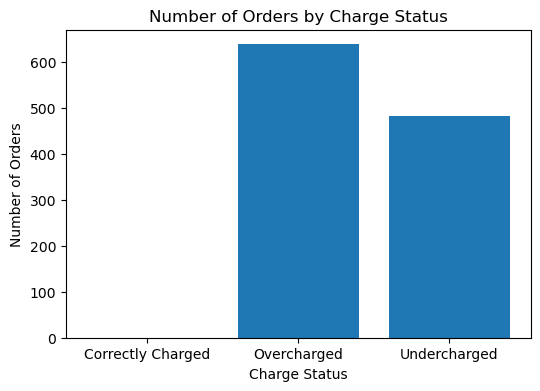

In [104]:
labels = ["Correctly Charged", "Overcharged", "Undercharged"]
values = [
    (final_df["difference"] == 0).sum(),
    (final_df["difference"] > 0).sum(),
    (final_df["difference"] < 0).sum()
]

plt.figure(figsize=(6,4))
plt.bar(labels, values)
plt.title("Number of Orders by Charge Status")
plt.xlabel("Charge Status")
plt.ylabel("Number of Orders")
plt.show()


## This graph shows the total monetary impact of overcharging and undercharging.It highlights how much money is affected due to incorrect courier charges, not just the number of orders

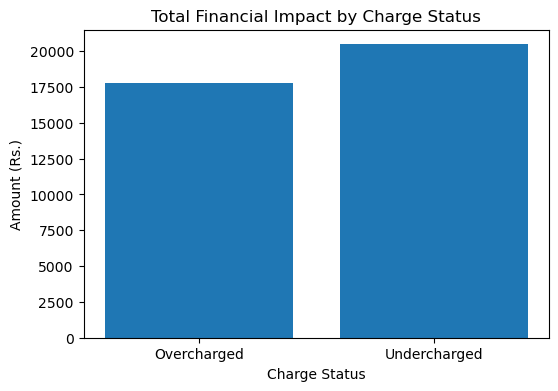

In [105]:
labels = ["Overcharged", "Undercharged"]
values = [
    final_df.loc[final_df["difference"] > 0, "difference"].sum(),
    final_df.loc[final_df["difference"] < 0, "difference"].abs().sum()
]

plt.figure(figsize=(6,4))
plt.bar(labels, values)
plt.title("Total Financial Impact by Charge Status")
plt.xlabel("Charge Status")
plt.ylabel("Amount (Rs.)")
plt.show()


## This scatter plot compares expected courier charges with the actual charges billed by the courier company.Points that do not align closely indicate overcharging or undercharging.

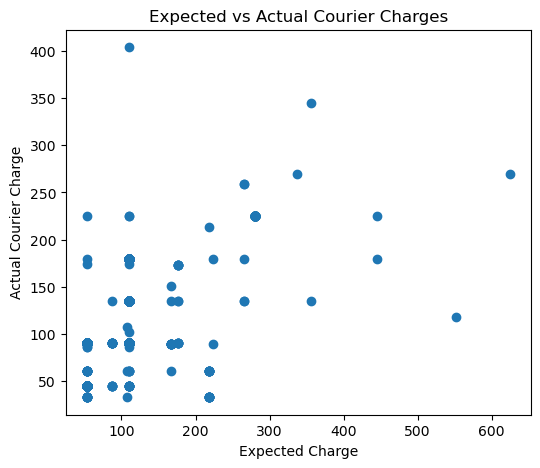

In [108]:
plt.figure(figsize=(6,5))
plt.scatter(final_df["expected_charge_x"], final_df["courier_charge"])
plt.xlabel("Expected Charge")
plt.ylabel("Actual Courier Charge")
plt.title("Expected vs Actual Courier Charges")
plt.show()

## The histogram shows both positive and negative charge differences. Negative values represent undercharged orders, while positive values represent overcharged orders.

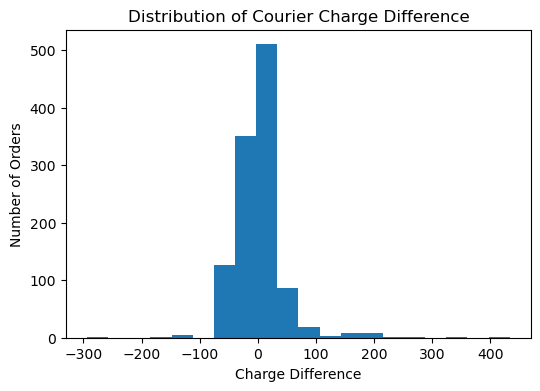

In [109]:
plt.figure(figsize=(6,4))
plt.hist(final_df["difference"], bins=20)
plt.title("Distribution of Courier Charge Difference")
plt.xlabel("Charge Difference")
plt.ylabel("Number of Orders")
plt.show()

# Insights
* Recalculating the weight of a shipment based on SKU-level data can be critical as even a few pounds of differences can put a business into different pricing tiers.

* There can be variation in the delivery zone determined from the pincodes of both the warehouse and customers, which may be different from what the courier company states.

* Using fixed rates and additional slab logic in courier rate cards can also indicate improper charging.

* Cases of correctly charged, over-charged, and under-charged orders were evident from the analysis, which necessitates the checking of bills.

* Since this process can be automated, it provides greater ease of control over costs and revenue leakage related to logistics.

# Conclusion
 This particular project has ascertained the correctness of courier bills by again calculating the weight of the shipment, the delivery area, as well as the costs to be expected through the use of data from Company X. By carrying out a comparison between costs to be expected and the bills received from the courier services on an order-by-order basis, the differences in bills can be effectively ascertained.

## Recommendations
* 1. The company X should ensure the validation of courier charges and carry out periodic verification of invoices in order to reduce the leakage of logistics costs.
* 2. It would also be important to put an automated system in place for calculating the expected charges for the courier company and alerting any discrepancies prior to the payment processing.
* 3. Verification of weight shipments and weight slabs at the time of shipment can help avoid weight calculation errors that might occur during billing.
* 4. This company needs to keep standardized information regarding orders, pin codes, and weight. This will reduce any discrepancies due to improper entry of information.